<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Sklearn/Module_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
url = 'bestsellers with categories.csv'

In [5]:
df = pd.read_csv(url)
df.sample()

,Name,Author,User Rating,Reviews,Price,Year,Genre
526,What Happened,Hillary Rodham Clinton,4.6,5492,18,2017,Non Fiction


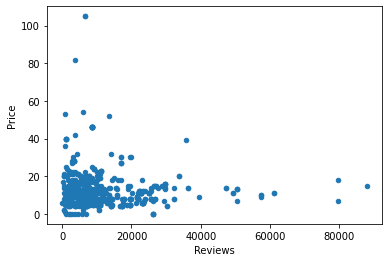

In [6]:
df.plot(x='Reviews', y='Price', kind = "scatter");

# Normalization

**$$x_{norm} = \frac{x-μ}{range(x)}$$**

In [7]:
norm = pd.DataFrame()

In [8]:
def normalize(data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)
  result = []

  for x in data:
    norm_x = (x - mean)/value_range
    result.append(norm_x)

  return result

In [9]:
def de_normalize(norm_value, data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)

  return norm_value*value_range + mean

In [10]:
norm['Price'] = normalize(df.Price)
norm['Reviews'] = normalize(df.Reviews)

In [11]:
norm

,Price,Reviews
0,-0.048571,0.061463
1,0.084762,-0.112766
2,0.018095,0.080016
3,-0.067619,0.107862
4,-0.010476,-0.048839
...,...,...
545,-0.048571,-0.028931
546,-0.048571,0.027080
547,-0.048571,0.027080
548,-0.048571,0.027080


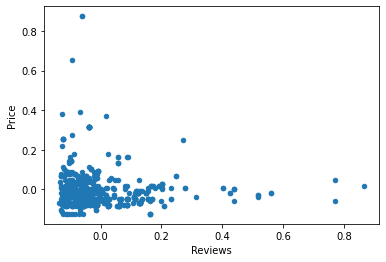

In [12]:
norm.plot(x='Reviews', y='Price', kind='scatter');

# Linear Regression

$$h(x)=w0 + w1*x$$

In [13]:
def h(w0, w1, x):
  return w0+w1*x


### Compute cost function

In [14]:
df['Reviews'].shape[0]

550

In [15]:
def cost_function(w0, w1, df):

  n = df.Reviews.shape[0]
  cost = 0
  for x, y in zip(df.Reviews, df.Price):
    cost = cost + (h(w0, w1, x)-y)**2

  return cost/2/n

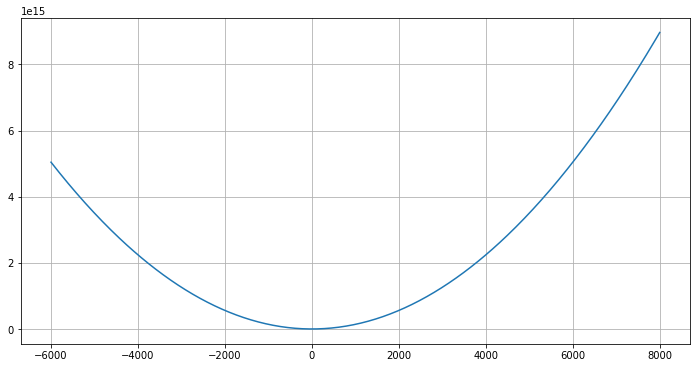

In [16]:
import matplotlib.pyplot as plt

w0 = 0
w1 = np.linspace(-6000, 8000, 500)

plt.figure(figsize=(12, 6))
plt.plot(w1, [cost_function(0, w, df) for w in w1])
plt.grid()

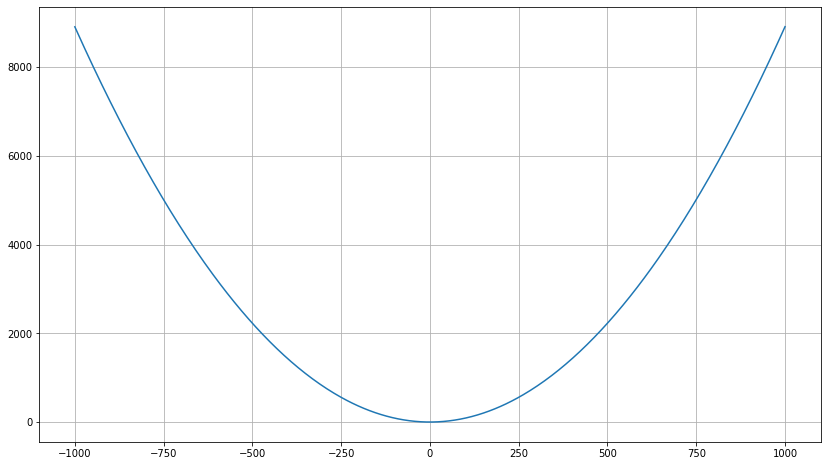

In [17]:
w0 = 0
w1 = np.linspace(-1000, 1000, 500)

plt.figure(figsize=(14, 8))
plt.plot(w1, [cost_function(0, w, norm) for w in w1])
plt.grid()

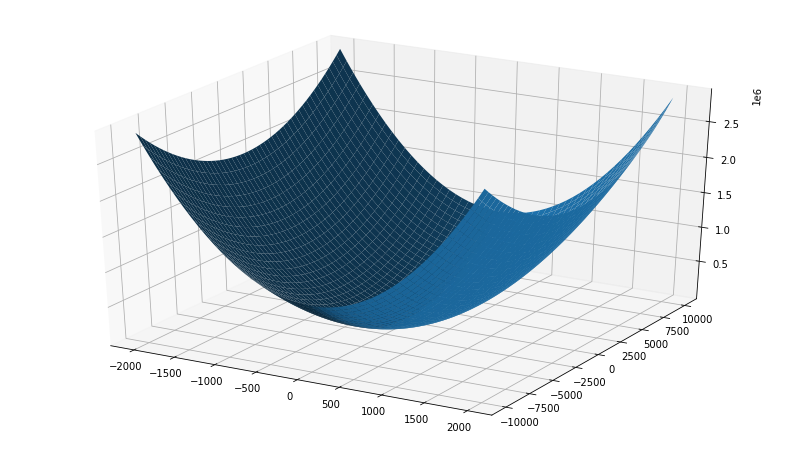

In [18]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection="3d")
grid_w0 = np.arange(-2000, 2000, 10)
grid_w1 = np.arange(-10000, 10000, 20)
w0, w1 = np.meshgrid(grid_w0, grid_w1)
z = cost_function(w0, w1, norm)
# z = cost_function(w0, w1, df)
ax.plot_surface(w0, w1, z)

plt.show()

# Gradient descent

### Compute gradients

In [19]:
def grad(w0, w1, df):

  d_w0 = 0
  d_w1 = 0
  n = df.Reviews.shape[0]

  for x, y in zip(df.Reviews, df.Price):
    d_w0 = d_w0 + (h(w0, w1, x)-y)
    d_w1 = d_w1 + (h(w0, w1, x)-y)**2

  return d_w0/n, d_w1/n


### Compute GD

In [20]:
def gradient_desc(w0, w1, df, iter_num, alpha):

  cost_history = []

  for i in range(iter_num):
    d_w0, d_w1 = grad(w0, w1, df)
    cost_history.append(cost_function(w0, w1, df))
    w0 = w0 - alpha*d_w0
    w1 = w1 - alpha*d_w1

    if i % 20 == 0:
      print('Cost function: ', cost_function(w0, w1, df))

  cost_history.append(cost_function(w0, w1, df))

  return w0, w1, cost_history

In [21]:
train_w0, train_w1, cost_history = gradient_desc(0, 0, norm, 100, 0.07)

Cost function:  0.005320467950119901
Cost function:  0.0053002781556334335
Cost function:  0.005284077194677068
Cost function:  0.005271816751109422
Cost function:  0.005263460357987964


In [22]:
train_w0

8.760668957951237e-19

In [23]:
train_w1

-0.07395467619523474

In [24]:
cost_history[-1]

0.005259115148112994

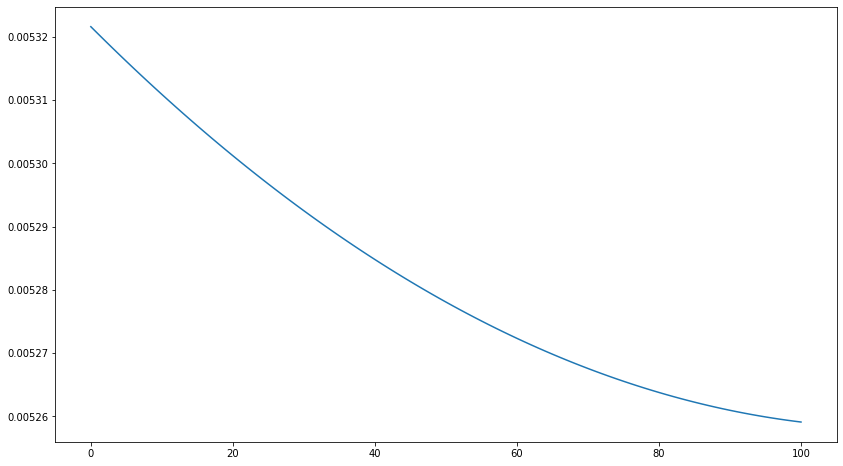

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(cost_history)

In [26]:
from sklearn import linear_model

In [27]:
model = linear_model.LinearRegression()

In [28]:
X = np.array([df.Reviews]).T

In [29]:
X.shape

(550, 1)

In [30]:
Y = np.array([df.Price]).T
Y.shape

(550, 1)

In [31]:
model.fit(X, Y)

LinearRegression()

In [32]:
model.coef_

array([[-0.00010091]])

In [33]:
model.intercept_

array([14.30619553])

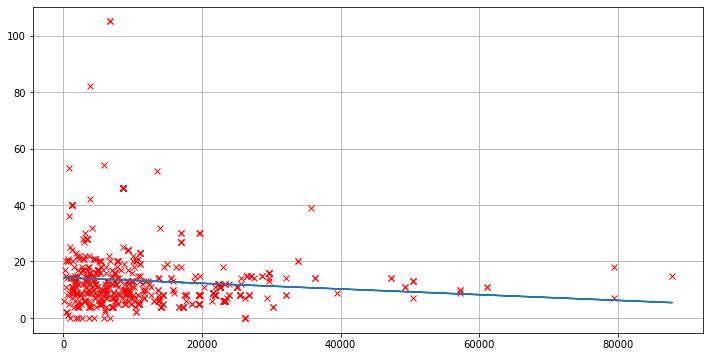

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.Reviews, df.Price, 'rx')
plt.plot(X, model.predict(X))
plt.grid()

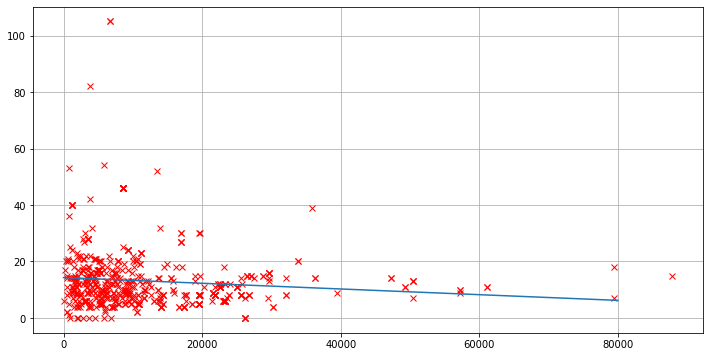

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df.Reviews, df.Price, 'rx')

x = np.linspace(0, 80000,1000)
plt.plot(x, h(model.intercept_[0], model.coef_[0][0], x))
plt.grid()

# Logistic regression

In [36]:
def load_data(filename):
  data = np.loadtxt(filename, delimiter=',')
  X = data[:,:2]
  y = data[:,2]

  return X, y

In [37]:
def plot_data(X, y, pos_label="y-1", neg_label="y=0"):
  positive = y == 1
  negative = y == 0

  #Plot examples
  plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
  plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


In [38]:
X_train, y_train = load_data("data.txt")

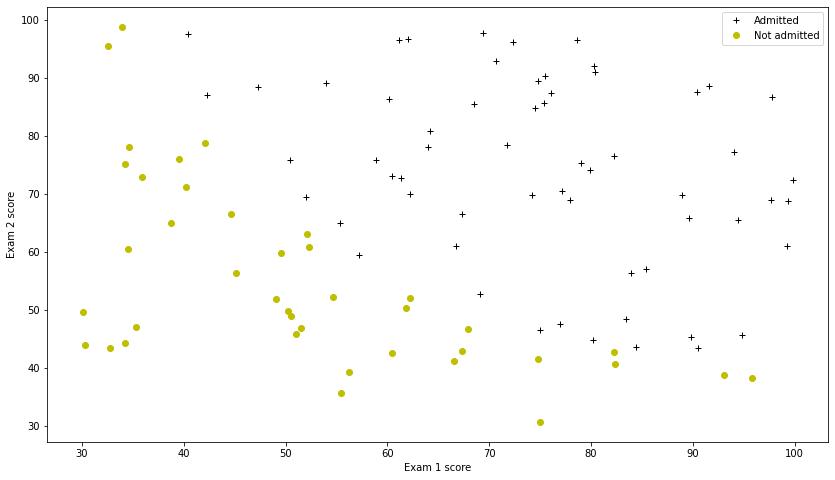

In [39]:
  #Plot examples
plt.figure(figsize=(14, 8))
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel("Exam 2 score")

# Set the x-axis label
plt.xlabel("Exam 1 score")

plt.legend(loc="upper right")
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression


In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
model.score(X_train, y_train)

0.89

In [49]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}